Enrico Grandi, Enrico Romano, Simone Lu, Lorenzo Antolini

# Task 0



In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from collections import Counter
warnings.filterwarnings('ignore')

C:\Users\AC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [52]:
df_cb = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\clicks_bidding.csv")
df_cr = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\clicks_regular.csv")
df_pr_co = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\prices_competitor.csv")
df_pr_ca = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\product_catalog.csv") 
df_sd = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\sales_data.csv") 
df_sl = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\sellers_list.csv") 
df_st = pd.read_csv(r"C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\stock.csv") 

# 1 -  Sales data





In [53]:
#new columns

df_sd["sales_tax"] = ((df_sd["sales_price_tax"]-df_sd["sales_price"])/df_sd["sales_price_tax"])
df_sd["regular_tax"] = ((df_sd["regular_price_tax"]-df_sd["regular_price"])/df_sd["regular_price_tax"])
df_sd["gross_profit"] = ((df_sd["sales_price_tax"]-df_sd["purchase_price"])/df_sd["sales_price_tax"])
df_sd["month"] = [str(x)[5:7] for x in df_sd["sale_date"]]

df_sd["profit"] = df_sd["sales_price"] - df_sd["purchase_price"]
df_sd["revenue"] = df_sd["sales_price"] * df_sd["quantity"]

df_sd["promotion_perc"] = df_sd["regular_price"] - df_sd["sales_price"]/ df_sd['regular_price'] *100

df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70000,0.166667,0.166644,0.289799,01,491.30000,3325.0,6887.241275
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20000,0.166667,0.166659,0.241569,01,343.80000,3825.0,10138.337183
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29000,0.166834,0.166604,0.311915,01,288.71000,4974.0,3649.566204
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70000,0.166667,0.166644,0.289799,01,491.30000,39900.0,6887.241275
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00000,0.166592,0.166702,0.171047,01,20.00000,3742.0,6414.405891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2021-12-31,161147,1,3110.0,4443.0,2592.0,3702.7778,2400.00000,0.166559,0.166604,0.228296,12,192.00000,2592.0,3632.776300
5768,2021-12-31,162101,2,24990.0,31100.0,20825.0,25916.6667,21249.99995,0.166667,0.166667,0.149660,12,-424.99995,41650.0,25836.313002
5769,2021-12-31,162102,7,26990.0,36656.0,22492.0,30546.2963,22500.00000,0.166654,0.166677,0.166358,12,-8.00000,157444.0,30472.663805
5770,2021-12-31,163385,4,59999.0,77777.0,49999.0,64813.8889,44633.58360,0.166669,0.166670,0.256095,12,5365.41640,199996.0,64736.746484


In [5]:
# check for null values
1-(len(df_sd.isna()))/len(df_sd)


0.0

In [6]:
# converting datatype

df_sd['sales_price'] = df_sd['sales_price'].values.astype('float64')
df_sd['regular_price'] = df_sd['regular_price'].values.astype('float64')
df_sd['purchase_price'] = df_sd['purchase_price'].values.astype('float64')
df_sd['profit'] = df_sd['profit'].values.astype('float64')

In [7]:
feature_list = ['sales_price','regular_price','purchase_price','profit'] 

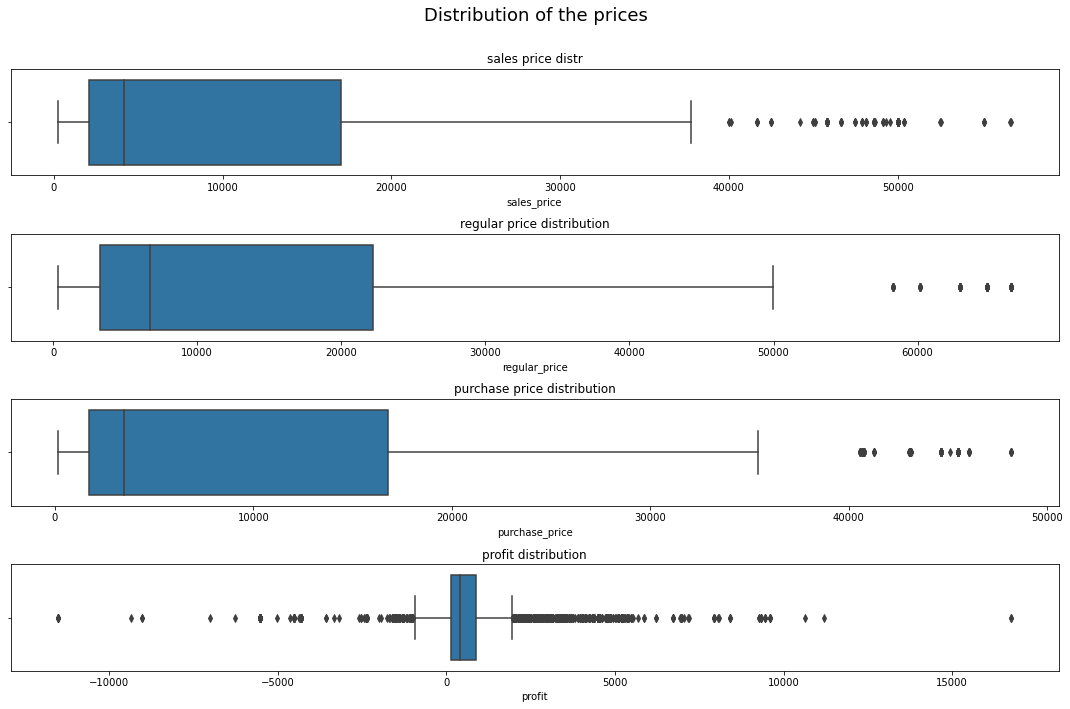

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
fig.suptitle('Distribution of the prices\n', size = 18)

sns.boxplot(df_sd['sales_price'], ax=axes[0], orient= "h")
axes[0].set_title("sales price distr");

sns.boxplot(df_sd['regular_price'], ax=axes[1], orient= "h")
axes[1].set_title("regular price distribution");

sns.boxplot(df_sd['purchase_price'], ax=axes[2], orient= "h")
axes[2].set_title("purchase price distribution");

sns.boxplot(df_sd['profit'], ax = axes[3], orient= "h")
axes[3].set_title("profit distribution");



plt.tight_layout()

## Tukey's IQR method

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

In [9]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [10]:
Outliers_IQR = IQR_method(df_sd,1,feature_list)

Total number of outliers is: 874


In [11]:
# drop outliers

df_out = df_sd.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [13]:
df_out.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70,0.166667,0.166644,0.289799,01,491.30,3325.0,6887.241275
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20,0.166667,0.166659,0.241569,01,343.80,3825.0,10138.337183
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29,0.166834,0.166604,0.311915,01,288.71,4974.0,3649.566204
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70,0.166667,0.166644,0.289799,01,491.30,39900.0,6887.241275
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00,0.166592,0.166702,0.171047,01,20.00,3742.0,6414.405891


In [14]:
# grouping operations for a better view of the dataset

df_sd_grouped = df_sd.groupby(["product_id", "sale_date"]).agg({
    "quantity":"sum",
    "sales_price_tax":["mean","max","min"],
    "regular_price_tax":["mean","max","min"],
    "sales_price":["mean","max","min"],
    "regular_price":["mean","max","min"],
    "purchase_price":["mean","max","min"],
    "sales_tax":["mean"],
    "gross_profit":["mean","max","min"],
})


df_sd_grouped.columns = [
                        'quantity_count',
                        'sales_price_tax_mean',
                        'sales_price_tax_max',
                        'sales_price_tax_min',
                        'regular_price_tax_mean',
                        'regular_price_tax_max',
                        'regular_price_tax_min',
                        'sales_price_mean',
                        'sales_price_max',
                        'sales_price_min',
                        'regular_price_mean',
                        'regular_price_max',
                        'regular_price_min',
                        'purchase_price_mean',
                        'purchase_price_max',
                        'purchase_price_min',
                        'sales_tax_mean',
                        'gross_profit_mean',
                        'gross_profit_max',
                        'gross_profit_min',
                        ]

df_sd_grouped

quantity_count  sales_price_tax_mean  \
product_id sale_date                                          
103851     2021-01-06               2                1190.0   
           2021-01-08               3                1190.0   
           2021-01-11               1                1190.0   
           2021-01-12               1                1190.0   
           2021-01-13               3                1190.0   
...                               ...                   ...   
177925     2021-12-27              18                9990.0   
           2021-12-28               7                9990.0   
           2021-12-29               4                9990.0   
           2021-12-30               7                9990.0   
           2021-12-31              15                9990.0   

                       sales_price_tax_max  sales_price_tax_min  \
product_id sale_date                                              
103851     2021-01-06               1190.0               1190.0   
           2021-01-08               1190.0               1190.0   
           2021-01-11               1190.0               1190.0   
           2021-01-12               1190.0               1190.0   
           2021-01-13               1190.0               1190.0   
...                                    ...                  ...   
177925     2021-12-27               9990.0               9990.0   
           2021-12-28               9990.0               9990.0   
           2021-12-29               9990.0               9990.0   
           2021-12-30               9990.0               9990.0   
           2021-12-31               9990.0               9990.0   

                       regular_price_tax_mean  regular_price_tax_max  \
product_id sale_date                                                   
103851     2021-01-06                  1190.0                 1190.0   
           2021-01-08                  1190.0                 1190.0   
           2021-01-11                  1190.0                 1190.0   
           2021-01-12                  1190.0                 1190.0   
           2021-01-13                  1190.0                 1190.0   
...                                       ...                    ...   
177925     2021-12-27                 22211.0                22211.0   
           2021-12-28                 22211.0                22211.0   
           2021-12-29                 22211.0                22211.0   
           2021-12-30                 22211.0                22211.0   
           2021-12-31                 22211.0                22211.0   

                       regular_price_tax_min  sales_price_mean  \
product_id sale_date                                             
103851     2021-01-06                 1190.0             992.0   
           2021-01-08                 1190.0             992.0   
           2021-01-11                 1190.0             992.0   
           2021-01-12                 1190.0             992.0   
           2021-01-13                 1190.0             992.0   
...                                      ...               ...   
177925     2021-12-27                22211.0            8325.0   
           2021-12-28                22211.0            8325.0   
           2021-12-29                22211.0            8325.0   
           2021-12-30                22211.0            8325.0   
           2021-12-31                22211.0            8325.0   

                       sales_price_max  sales_price_min  regular_price_mean  \
product_id sale_date                                                          
103851     2021-01-06            992.0            992.0            991.6667   
           2021-01-08            992.0            992.0            991.6667   
           2021-01-11            992.0            992.0            991.6667   
           2021-01-12            992.0            992.0            991.6667   
           2021-01-13            992.0            992.0      

# 2 - Product Catalog
- This is the product database. All information must be present here: 
- Price
- Who is the seller? 
- Average click cost 
- Number of click 

![image.png](attachment:image.png)
 

In [15]:
df_pr_ca = df_pr_ca.set_index("product_id")
df_pr_ca.head()

,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
product_id,,,,,
143226,2259,1412,1412,522,2719
106100,2880,2856,1169,309,1937
149306,2880,2856,4877,455,3618
160649,624,2291,601,543,2194
124455,1676,2193,2409,289,3120


In [16]:
# check for null value
1-(len(df_pr_ca.isna()))/len(df_pr_ca)

0.0

### Here it is a merge of the two datasets: sales data + product categories, because you have to math the catalogue information with the sales transaction data.

In [17]:
#merge with price
df_pr_cad = df_pr_ca.merge(df_sd_grouped, left_index=True, right_index=True).reset_index()
df_pr_cad

,product_id,sale_date,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,regular_price_mean,regular_price_max,regular_price_min,purchase_price_mean,purchase_price_max,purchase_price_min,sales_tax_mean,gross_profit_mean,gross_profit_max,gross_profit_min
0,103851,2021-01-06,2259,944,1867,367,2979,2,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.5026,773.5026,773.5026,0.166387,0.349998,0.349998,0.349998
1,103851,2021-01-08,2259,944,1867,367,2979,3,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.5026,773.5026,773.5026,0.166387,0.349998,0.349998,0.349998
2,103851,2021-01-11,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.5026,773.5026,773.5026,0.166387,0.349998,0.349998,0.349998
3,103851,2021-01-12,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.5026,773.5026,773.5026,0.166387,0.349998,0.349998,0.349998
4,103851,2021-01-13,2259,944,1867,367,2979,3,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.5026,773.5026,773.5026,0.166387,0.349998,0.349998,0.349998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,177925,2021-12-27,2259,944,1753,522,3247,18,9990.0,9990.0,...,18509.2593,18509.2593,18509.2593,7035.6000,7035.6000,7035.6000,0.166667,0.295736,0.295736,0.295736
5768,177925,2021-12-28,2259,944,1753,522,3247,7,9990.0,9990.0,...,18509.2593,18509.2593,18509.2593,7035.6000,7035.6000,7035.6000,0.166667,0.295736,0.295736,0.295736
5769,177925,2021-12-29,2259,944,1753,522,3247,4,9990.0,9990.0,...,18509.2593,18509.2593,18509.2593,7035.6000,7035.6000,7035.6000,0.166667,0.295736,0.295736,0.295736
5770,177925,2021-12-30,2259,944,1753,522,3247,7,9990.0,9990.0,...,18509.2593,18509.2593,18509.2593,7035.6001,7035.6001,7035.6001,0.166667,0.295736,0.295736,0.295736


In [18]:
# gruping sales data and product catalog for the 3 sub category

df_pr_cad_xcat = df_pr_cad.groupby(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).agg({
    "quantity_count":"count",
    "sales_price_tax_mean":"mean",
    "regular_price_tax_mean":"mean",
    "sales_price_mean":"mean",
    "regular_price_mean":"mean",
    "purchase_price_mean":"mean",
    "sales_tax_mean":"mean",
    "gross_profit_mean":"mean",
})

df_pr_cad_xcat.columns = ['sub_quantity_count',
                          'sub_sales_price_tax_mean',
                          'sub_regular_price_tax_mean',
                           'sub_sales_price_mean',
                          'sub_regular_price_mean', 
                          'sub_purchase_price_mean',
                           'sub_sales_tax_mean', 
                          'sub_gross_profit_mean']
df_pr_cad_xcat

sub_quantity_count  \
sale_date  coded_cat1 coded_cat2 coded_cat3                       
2021-01-02 2259       2015       493                          1   
2021-01-03 2259       1714       647                          1   
2021-01-04 1676       2005       2467                         2   
                      2193       2401                         1   
                                 2409                         2   
...                                                         ...   
2021-12-31 2259       1714       805                          1   
                                 900                          1   
                                 2353                         3   
                                 2431                         2   
                                 2633                         1   

                                             sub_sales_price_tax_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                             
2021-01-02 2259       2015       493                      3990.000000   
2021-01-03 2259       1714       647                      4590.000000   
2021-01-04 1676       2005       2467                    23714.000000   
                      2193       2401                    28184.000000   
                                 2409                    19990.000000   
...                                                               ...   
2021-12-31 2259       1714       805                      7990.000000   
                                 900                      2490.000000   
                                 2353                      676.333333   
                                 2431                     3304.500000   
                                 2633                     1490.000000   

                                             sub_regular_price_tax_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                               
2021-01-02 2259       2015       493                             8322.0   
2021-01-03 2259       1714       647                            12211.0   
2021-01-04 1676       2005       2467                           33327.5   
                      2193       2401                           32211.0   
                                 2409                           25271.5   
...                                                                 ...   
2021-12-31 2259       1714       805                             9433.0   
                                 900                             5544.0   
                                 2353                             992.0   
                                 2431                            4721.0   
                                 2633                            1690.0   

                                             sub_sales_price_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                         
2021-01-02 2259       2015       493                  3325.000000   
2021-01-03 2259       1714       647                  3825.000000   
2021-01-04 1676       2005       2467                19762.000000   
                      2193       2401                23486.500000   
                                 2409                16658.000000   
...                                                           ...   
2021-12-31 2259       1714       805                  6658.000000   
                                 900                  2075.000000   
                                 2353                  563.666667   
                                 2431                 2754.000000   
                                 2633                 1242.000000   

                                             sub_regular_price_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                           
2021-01-02 2259       2015       493                    6935.185200   
2021-01-03 2259       1714       647                   10175.925900   
2021-01-04 1676       2005       2467                  27772.6852

In [19]:
df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"])
df_pr_cad = df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).merge(df_pr_cad_xcat, left_index=True, right_index=True)

In [20]:
df_pr_cad = df_pr_cad.reset_index()
df_pr_cad

,sale_date,coded_cat1,coded_cat2,coded_cat3,product_id,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_max,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean
0,2021-01-02,2259,2015,493,110853,522,1709,1,3990.0,3990.0,...,0.289799,0.289799,1,3990.000000,8322.0,3325.000000,6935.185200,2833.70000,0.166667,0.289799
1,2021-01-03,2259,1714,647,157318,522,1825,1,4590.0,4590.0,...,0.241569,0.241569,1,4590.000000,12211.0,3825.000000,10175.925900,3481.20000,0.166667,0.241569
2,2021-01-04,1676,2005,2467,128194,289,2994,6,20438.0,20438.0,...,0.113706,0.113706,2,23714.000000,33327.5,19762.000000,27772.685200,19107.03955,0.166652,0.184493
3,2021-01-04,1676,2005,2467,156474,367,2949,1,26990.0,26990.0,...,0.255280,0.255280,2,23714.000000,33327.5,19762.000000,27772.685200,19107.03955,0.166652,0.184493
4,2021-01-04,1676,2193,2401,154557,522,2850,2,28184.0,28184.0,...,0.236463,0.236463,1,28184.000000,32211.0,23486.500000,26842.592600,21519.52000,0.166673,0.236463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2021-12-31,2259,1714,2353,112377,522,3147,1,690.0,690.0,...,0.065488,0.065488,3,676.333333,992.0,563.666667,826.645167,550.15750,0.166507,0.198952
5768,2021-12-31,2259,1714,2353,125506,522,2840,4,990.0,990.0,...,0.230723,0.230723,3,676.333333,992.0,563.666667,826.645167,550.15750,0.166507,0.198952
5769,2021-12-31,2259,1714,2431,126707,442,2621,6,3499.0,3499.0,...,0.428408,0.428408,2,3304.500000,4721.0,2754.000000,3934.259250,2200.00000,0.166589,0.328352
5770,2021-12-31,2259,1714,2431,161147,442,2623,1,3110.0,3110.0,...,0.228296,0.228296,2,3304.500000,4721.0,2754.000000,3934.259250,2200.00000,0.166589,0.328352


# 3 - Stock 
![image.png](attachment:image.png)

In [21]:
df_st.head()

,stock_date,product_id,total_stock
0,2021-04-16,161147,216
1,2021-02-21,142254,80
2,2021-01-05,134200,620
3,2021-10-25,143220,532
4,2021-02-23,128194,146


In [22]:
# check for null value in dataset
1-(len(df_st.isna()))/len(df_st)

0.0

In [23]:
# new index for this dataset
df_st.columns = ['sale_date', 'product_id', 'total_stock']
df_st = df_st.set_index(["sale_date","product_id"])
df_st

,,total_stock
sale_date,product_id,
2021-04-16,161147,216
2021-02-21,142254,80
2021-01-05,134200,620
2021-10-25,143220,532
2021-02-23,128194,146
...,...,...
2021-12-22,156474,4
2021-11-19,112377,315
2021-08-17,136250,1087


### Here it is a merge of the previous merged dataset with the stock values.

In [24]:

df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"]).merge(df_st, left_index=True, right_index=True).reset_index()
df_pr_cad

,sale_date,product_id,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean,total_stock
0,2021-01-02,110853,2259,2015,493,522,1709,1,3990.0,3990.0,...,0.289799,1,3990.000000,8322.0,3325.000000,6935.185200,2833.70000,0.166667,0.289799,302
1,2021-01-03,157318,2259,1714,647,522,1825,1,4590.0,4590.0,...,0.241569,1,4590.000000,12211.0,3825.000000,10175.925900,3481.20000,0.166667,0.241569,296
2,2021-01-04,128194,1676,2005,2467,289,2994,6,20438.0,20438.0,...,0.113706,2,23714.000000,33327.5,19762.000000,27772.685200,19107.03955,0.166652,0.184493,147
3,2021-01-04,156474,1676,2005,2467,367,2949,1,26990.0,26990.0,...,0.255280,2,23714.000000,33327.5,19762.000000,27772.685200,19107.03955,0.166652,0.184493,44
4,2021-01-04,154557,1676,2193,2401,522,2850,2,28184.0,28184.0,...,0.236463,1,28184.000000,32211.0,23486.500000,26842.592600,21519.52000,0.166673,0.236463,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2021-12-31,112377,2259,1714,2353,522,3147,1,690.0,690.0,...,0.065488,3,676.333333,992.0,563.666667,826.645167,550.15750,0.166507,0.198952,575
5768,2021-12-31,125506,2259,1714,2353,522,2840,4,990.0,990.0,...,0.230723,3,676.333333,992.0,563.666667,826.645167,550.15750,0.166507,0.198952,295
5769,2021-12-31,126707,2259,1714,2431,442,2621,6,3499.0,3499.0,...,0.428408,2,3304.500000,4721.0,2754.000000,3934.259250,2200.00000,0.166589,0.328352,378
5770,2021-12-31,161147,2259,1714,2431,442,2623,1,3110.0,3110.0,...,0.228296,2,3304.500000,4721.0,2754.000000,3934.259250,2200.00000,0.166589,0.328352,217


# 4 - Prices competitor 
contains all the prices for a specific product, for a 
specific seller and a specific date.
our client seller id is 24

- Focus on the price in each quarters

![image.png](attachment:image.png)


In [25]:
df_pr_co


,comp_date,seller_id,product_id,price
0,2021-01-01,23,112437,7999
1,2021-01-01,24,112437,8499
2,2021-01-01,26,112437,6990
3,2021-01-01,41,112437,7400
4,2021-01-01,48,112437,8499
...,...,...,...,...
82860,2021-12-31,26,164725,31990
82861,2021-12-31,48,164725,31990
82862,2021-12-31,24,177925,9990
82863,2021-12-31,26,177925,9990


In [26]:
# check for null values
1-(len(df_pr_co.isna()))/len(df_pr_co)

0.0

In [27]:
# groupby operation 

df_pr_co_grouped_seller = df_pr_co.groupby(["comp_date","product_id","seller_id"]).agg({
    "price":"mean"
}).reset_index()
df_pr_co_grouped_seller

,comp_date,product_id,seller_id,price
0,2021-01-01,103851,23,1190.0
1,2021-01-01,103851,24,1190.0
2,2021-01-01,103851,26,1190.0
3,2021-01-01,103851,48,1190.0
4,2021-01-01,103851,180,1099.0
...,...,...,...,...
77483,2021-12-31,164725,26,31990.0
77484,2021-12-31,164725,48,31990.0
77485,2021-12-31,177925,24,9990.0
77486,2021-12-31,177925,26,9990.0


In [28]:
#Here the pivot is made to put the information of the sellers in the column
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller.pivot_table(values='price',columns=['seller_id'],index=["product_id","comp_date"])
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.reset_index()
df_pr_co_grouped_seller_pivot.columns = ['product_id', 'sale_date', "price_seller_23", "price_seller_24", "price_seller_26", "price_seller_41", "price_seller_48", "price_seller_180", "aprice_seller_188", "price_seller_407", "price_seller_490"]
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.set_index(["sale_date","product_id"])
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-02,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-03,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-04,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-05,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177925,NaN,9990.0,9990.0,NaN,9990.0,NaN,NaN,NaN,NaN
2021-12-28,177925,NaN,9990.0,9990.0,NaN,9990.0,NaN,NaN,NaN,NaN
2021-12-29,177925,NaN,9990.0,9990.0,NaN,9990.0,NaN,NaN,NaN,NaN


In [29]:
# fill the nan of the missing value with the mean 
c = df_pr_co_grouped_seller_pivot.filter(like='price_seller').columns
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.fillna(dict.fromkeys(c, df_pr_co_grouped_seller_pivot[c].mean(1)))
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-02,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-03,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-04,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-05,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177925,9990.0,9990.0,9990.0,9990.000000,9990.0,9990.0,9990.0,9990.0,9990.000000
2021-12-28,177925,9990.0,9990.0,9990.0,9990.000000,9990.0,9990.0,9990.0,9990.0,9990.000000
2021-12-29,177925,9990.0,9990.0,9990.0,9990.000000,9990.0,9990.0,9990.0,9990.0,9990.000000


In [30]:
df_pr_co_grouped = df_pr_co.groupby(["comp_date","product_id"]).agg({
    "price":["min","max","mean"]
}).reset_index()
df_pr_co_grouped.columns = ['sale_date', 'product_id', 'price_sellers_min', 'price_sellers_max',"price_sellers_mean"]
df_pr_co_grouped = df_pr_co_grouped.set_index(["sale_date","product_id"])
df_pr_co_grouped

price_sellers_min  price_sellers_max  \
sale_date  product_id                                         
2021-01-01 103851                    998               1190   
           107645                   1750               3990   
           110675                   2690               3690   
           110853                   3990               7490   
           110908                   4490               6990   
...                                  ...                ...   
2021-12-31 162101                  24990              28990   
           162102                  26990              27590   
           163385                  59999              59999   
           164725                  31990              31990   
           177925                   9990               9990   

                       price_sellers_mean  
sale_date  product_id                      
2021-01-01 103851             1149.571429  
           107645             2723.375000  
           110675             3400.750000  
           110853             5687.333333  
           110908             5892.250000  
...                                   ...  
2021-12-31 162101            25940.800000  
           162102            27174.800000  
           163385            59999.000000  
           164725            31990.000000  
           177925             9990.000000  

[15018 rows x 3 columns]

Losing the least number of rows from the sales data dataset (which I remember is our sales data) is crucial. Losing information of our competitors is fine, as long as it is information about products that are not present in our transactions. 

In this regard, we should now save the product ids we are going to lose to check how many of them are substitute products, based on the 3 categories.

To hit the target above we're going to do the join, which keeps all the rows in the table on the left, and merges the information with those on the right, the missing data will be nan

In [31]:
df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"])
df_pr_cad = df_pr_cad.join(df_pr_co_grouped_seller_pivot)
df_pr_cad = df_pr_cad.join(df_pr_co_grouped)
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 110853            2259        2015         493          522   
2021-01-03 157318            2259        1714         647          522   
2021-01-04 128194            1676        2005        2467          289   
           156474            1676        2005        2467          367   
           154557            1676        2193        2401          522   
...                           ...         ...         ...          ...   
2021-12-31 112377            2259        1714        2353          522   
           125506            2259        1714        2353          522   
           126707            2259        1714        2431          442   
           161147            2259        1714        2431          442   
           121807            2259        1714        2633          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 110853            1709               1                3990.0   
2021-01-03 157318            1825               1                4590.0   
2021-01-04 128194            2994               6               20438.0   
           156474            2949               1               26990.0   
           154557            2850               2               28184.0   
...                           ...             ...                   ...   
2021-12-31 112377            3147               1                 690.0   
           125506            2840               4                 990.0   
           126707            2621               6                3499.0   
           161147            2623               1                3110.0   
           121807            2714               6                1490.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 110853                   3990.0               3990.0   
2021-01-03 157318                   4590.0               4590.0   
2021-01-04 128194                  20438.0              20438.0   
           156474                  26990.0              26990.0   
           154557                  28184.0              28184.0   
...                                    ...                  ...   
2021-12-31 112377                    690.0                690.0   
           125506                    990.0                990.0   
           126707                   3499.0               3499.0   
           161147                   3110.0               3110.0   
           121807                   1490.0               1490.0   

                       regular_price_tax_mean  ...  price_seller_26  \
sale_date  product_id                          ...                    
2021-01-02 110853                      8322.0  ...           7490.0   
2021-01-03 157318                     12211.0  ...          10990.0   
2021-01-04 128194                     31666.0  ...          26999.0   
           156474                     34989.0  ...          31490.0   
           154557                     32211.0  ...          28990.0   
...                                       ...  ...              ...   
2021-12-31 112377                      1100.0  ...            990.0   
           125506                      1433.0  ...           1290.0   
           126707                      4999.0  ...           3499.0   
           161147                      4443.0  ...           2990.0   
           121807                      1690.0  ...           1690.0   

                       price_seller_41  price_seller_48  price_seller_180  \
sale_date  product_id                                                       
2021-01-02 110853          5065.000000           7490.0       5687.333333   
2021-01-03 157318          8856.666667          10990.0  

# 5 - Clicks bidding
- are the data of the sellers who paid to be the top 3 on the price comparison page
- roas calculation


![image-2.png](attachment:image-2.png)

### Here as we had seen, you have to group the days, with the average, min and max. then do the 6 pivots and remove the nulls. Once done go and do the join as above

In [32]:
df_cb["date"] = [x[0:10] for x in df_cb["date"]]
df_cb = df_cb.groupby(["date","seller","product_id"]).agg({
    
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cb.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]

df_cb

position_mean  position_min  position_max  \
date       seller product_id                                              
2021-04-02 24     122363           1.000000             1             1   
                  149306           2.000000             2             2   
                  154553           2.000000             2             2   
                  156095           1.222222             1             2   
                  156474           3.000000             3             3   
...                                     ...           ...           ...   
2022-01-04 26     161147           3.000000             3             3   
                  162101           3.000000             3             3   
                  163385           2.000000             2             2   
           41     156095           1.000000             1             1   
           407    107645           2.000000             2             2   

                              price_max  price_min    price  
date       seller product_id                                 
2021-04-02 24     122363       120390.0     5990.0  13990.0  
                  149306        25999.0    15889.0  21890.0  
                  154553        23999.0    21990.0  20990.0  
                  156095         3996.0     3629.0   3690.0  
                  156474        31490.0    31490.0  27991.0  
...                                 ...        ...      ...  
2022-01-04 26     161147         4499.0     2990.0   2990.0  
                  162101        28990.0    24389.0  24990.0  
                  163385        58330.0    58330.0  58330.0  
           41     156095         3996.0     3629.0   3996.0  
           407    107645         3990.0     1688.0   1699.0  

[8915 rows x 6 columns]

In [33]:
df_cb_pivot_position_mean = df_cb.pivot_table(values='position_mean',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_mean_23",
                                 "cpc_position_mean_24", 
                                 "cpc_position_mean_26",
                                 "cpc_position_mean_41",
                                 "cpc_position_mean_48",
                                 "cpc_position_mean_180",
                                 "cpc_position_mean_188",
                                 "cpc_position_mean_407", 
                                 "cpc_position_mean_490"]

df_cb_pivot_position_mean = df_cb_pivot_position_mean.set_index(["sale_date","product_id"])
df_cb_pivot_position_mean.mean()

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [34]:
df_cb_pivot_position_mean

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
5902,177925,2021-12-29,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5903,177925,2021-12-30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5904,177925,2021-12-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,177925,2022-01-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HERE the null values, I will replace them with the averages of the seller's position (of the column), so as to avoid the case of the first position, the same will be done with the other two position tables

In [35]:
c = df_cb_pivot_position_mean.filter(like='cpc_position_mean').columns
for x in c:
    df_cb_pivot_position_mean[x] = df_cb_pivot_position_mean[x].fillna(df_cb_pivot_position_mean.mean()[x])

df_cb_pivot_position_mean

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
5902,177925,2021-12-29,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5903,177925,2021-12-30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5904,177925,2021-12-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,177925,2022-01-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_cb_pivot_position_min = df_cb.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_min_23",
                                 "cpc_position_min_24", 
                                 "cpc_position_min_26",
                                 "cpc_position_min_41",
                                 "cpc_position_min_48",
                                 "cpc_position_min_180",
                                 "cpc_position_min_188",
                                 "cpc_position_min_407", 
                                 "cpc_position_min_490"]

df_cb_pivot_position_min = df_cb_pivot_position_min.set_index(["sale_date","product_id"])
df_cb_pivot_position_min

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [37]:
c = df_cb_pivot_position_min.filter(like='cpc_position_min').columns
for x in c:
    df_cb_pivot_position_min[x] = df_cb_pivot_position_min[x].fillna(df_cb_pivot_position_min.mean()[x])

df_cb_pivot_position_min

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
5902,177925,2021-12-29,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5903,177925,2021-12-30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5904,177925,2021-12-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,177925,2022-01-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_cb_pivot_position_max = df_cb.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_max_23",
                                 "cpc_position_max_24", 
                                 "cpc_position_max_26",
                                 "cpc_position_max_41",
                                 "cpc_position_max_48",
                                 "cpc_position_max_180",
                                 "cpc_position_max_188",
                                 "cpc_position_max_407", 
                                 "cpc_position_max_490"]

df_cb_pivot_position_max = df_cb_pivot_position_max.set_index(["sale_date","product_id"])
df_cb_pivot_position_max

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [39]:
c = df_cb_pivot_position_max.filter(like='cpc_position_max').columns
for x in c:
    df_cb_pivot_position_max[x] = df_cb_pivot_position_max[x].fillna(df_cb_pivot_position_max.mean()[x])

df_cb_pivot_position_max

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
5902,177925,2021-12-29,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5903,177925,2021-12-30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5904,177925,2021-12-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,177925,2022-01-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HERE the null values, I am going to replace them with the product averages (of the row), because the price is more indicative of the product, just look at a correlation map, the same will be done with the other two cpc tables

In [40]:
df_cb_pivot_price_max = df_cb.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_max_23",
                                 "cpc_max_24", 
                                 "cpc_max_26",
                                 "cpc_max_41",
                                 "cpc_max_48",
                                 "cpc_max_180",
                                 "cpc_max_188",
                                 "cpc_max_407", 
                                 "cpc_max_490"]

df_cb_pivot_price_max = df_cb_pivot_price_max.set_index(["sale_date","product_id"])


c = df_cb_pivot_price_max.filter(like='cpc_max').columns
df_cb_pivot_price_max = df_cb_pivot_price_max.fillna(dict.fromkeys(c, df_cb_pivot_price_max[c].mean(1)))
df_cb_pivot_price_max

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [41]:
df_cb_pivot_price_min = df_cb.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_min_23",
                                 "cpc_min_24", 
                                 "cpc_min_26",
                                 "cpc_min_41",
                                 "cpc_min_48",
                                 "cpc_min_180",
                                 "cpc_min_188",
                                 "cpc_min_407", 
                                 "cpc_min_490"]
df_cb_pivot_price_min = df_cb_pivot_price_min.set_index(["sale_date","product_id"])

c = df_cb_pivot_price_min.filter(like='cpc_min').columns
df_cb_pivot_price_min = df_cb_pivot_price_min.fillna(dict.fromkeys(c, df_cb_pivot_price_min[c].mean(1)))
df_cb_pivot_price_min

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [42]:
df_cb_pivot_price = df_cb.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "price_product_cpc_23",
                                 "price_product_cpc_24", 
                                 "price_product_cpc_26",
                                 "price_product_cpc_41",
                                 "price_product_cpc_48",
                                 "price_product_cpc_180",
                                 "price_product_cpc_188",
                                 "price_product_cpc_407", 
                                 "price_product_cpc_490"]
df_cb_pivot_price = df_cb_pivot_price.set_index(["sale_date","product_id"])


c = df_cb_pivot_price.filter(like='price_product_cpc').columns
df_cb_pivot_price = df_cb_pivot_price.fillna(dict.fromkeys(c, df_cb_pivot_price[c].mean(1)))
df_cb_pivot_price


ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

### join with previous dataset

- Note that the number of rows in this df_pr_cad table, even though we did several joins, merge, we have no person rows.

- This is what we wanted, because in the end we are interested in OUR point of view

In [43]:
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_mean)
df_pr_cad

ValueError: cannot join with no overlapping index names

# 6 - Clicks regular 
- These are the data of the 10 sellers (appearing immediately after the bidding sellers) in descending order of the price of a product 
- how to deal with nan?
- fill nan with the data of the product competitors as they provide information on seller price and day of purchase

![image.png](attachment:image.png)

In [ ]:
df_cr["date"] = [x[0:10] for x in df_cr["date"]]
df_cr = df_cr.groupby(["date","seller","product_id"]).agg({
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cr.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]
df_cr

In [ ]:
df_cr.describe()

In [ ]:
df_cr_pivot_price_max = df_cr.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "product_price_max_23",
                                 "product_price_max_24", 
                                 "product_price_max_26",
                                 "product_price_max_41",
                                 "product_price_max_48",
                                 "product_price_max_180",
                                 "product_price_max_188",
                                 "product_price_max_407", 
                                 "product_price_max_490"]

df_cr_pivot_price_max = df_cr_pivot_price_max.set_index(["sale_date","product_id"])

c = df_cr_pivot_price_max.filter(like='product_price').columns
df_cr_pivot_price_max = df_cr_pivot_price_max.fillna(dict.fromkeys(c, df_cr_pivot_price_max[c].mean(1)))

df_cr_pivot_price_max

In [ ]:
df_cr_pivot_price_min = df_cr.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "product_price_min_23",
                                 "product_price_min_24", 
                                 "product_price_min_26",
                                 "product_price_min_41",
                                 "product_price_min_48",
                                 "product_price_min_180",
                                 "product_price_min_188",
                                 "product_price_min_407", 
                                 "product_price_min_490"]

df_cr_pivot_price_min = df_cr_pivot_price_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_price_min.filter(like='product_price').columns
df_cr_pivot_price_min = df_cr_pivot_price_min.fillna(dict.fromkeys(c, df_cr_pivot_price_min[c].mean(1)))
df_cr_pivot_price_min

In [ ]:
df_cr_pivot_price = df_cr.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "product_price_23",
                                 "product_price_24", 
                                 "product_price_26",
                                 "product_price_41",
                                 "product_price_48",
                                 "product_price_180",
                                 "product_price_188",
                                 "product_price_407", 
                                 "product_price_490"]

df_cr_pivot_price = df_cr_pivot_price.set_index(["sale_date","product_id"])
c = df_cr_pivot_price.filter(like='product_price').columns
df_cr_pivot_price = df_cr_pivot_price.fillna(dict.fromkeys(c, df_cr_pivot_price[c].mean(1)))
df_cr_pivot_price

In [ ]:
df_cr_pivot_position_min = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_min",
                                 "positon_24_min", 
                                 "positon_26_min",
                                 "positon_41_min",
                                 "positon_48_min",
                                 "positon_180_min",
                                 "positon_188_min",
                                 "positon_407_min", 
                                 "positon_490_min"]

df_cr_pivot_position_min = df_cr_pivot_position_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_min.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_min[x] = df_cr_pivot_position_min[x].fillna(df_cr_pivot_position_min.mean()[x])
df_cr_pivot_position_min


In [ ]:
df_cr_pivot_position_max = df_cr.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_max",
                                 "positon_24_max", 
                                 "positon_26_max",
                                 "positon_41_max",
                                 "positon_48_max",
                                 "positon_180_max",
                                 "positon_188_max",
                                 "positon_407_max", 
                                 "positon_490_max"]

df_cr_pivot_position_max = df_cr_pivot_position_max.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_max.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_max[x] = df_cr_pivot_position_max[x].fillna(df_cr_pivot_position_max.mean(0)[x])
df_cr_pivot_position_max


In [ ]:
df_cr_pivot_position_mean = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_mean",
                                 "positon_24_mean", 
                                 "positon_26_mean",
                                 "positon_41_mean",
                                 "positon_48_mean",
                                 "positon_180_mean",
                                 "positon_188_mean",
                                 "positon_407_mean", 
                                 "positon_490_mean"]

df_cr_pivot_position_mean = df_cr_pivot_position_mean.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_mean.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_mean[x] = df_cr_pivot_position_mean[x].fillna(df_cr_pivot_position_mean.mean()[x])
df_cr_pivot_position_mean


In [44]:
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_mean)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_max)

df_pr_cad

NameError: name 'df_cr_pivot_price_max' is not defined

# Now we have to remove the resulting nan from all joins and merges. There are some values that are better averaged in rows others in columns. For example, values referring to seller in column, values referring to product in row

In [45]:
media_in_colonna = [

"positon_23_mean",
"positon_24_mean",
"positon_26_mean",
"positon_41_mean",
"positon_48_mean",
"positon_180_mean",
"positon_188_mean",
"positon_407_mean",
"positon_490_mean",
"positon_23_min",
"positon_24_min",
"positon_26_min",
"positon_41_min",
"positon_48_min",
"positon_180_min",
"positon_188_min",
"positon_407_min",
"positon_490_min",
"positon_23_max",
"positon_24_max",
"positon_26_max",
"positon_41_max",
"positon_48_max",
"positon_180_max",
"positon_188_max",
"positon_407_max",
"positon_490_max",
]
for x in media_in_colonna:
    df_pr_cad[x] = df_pr_cad[x].fillna(df_pr_cad.mean(0)[x])
df_pr_cad

KeyError: 'positon_23_mean'

In [46]:
media_in_riga = [
    "quantity_count",
"sales_price_tax_mean",
"sales_price_tax_max",
"sales_price_tax_min",
"regular_price_tax_mean",
"regular_price_tax_max",
"regular_price_tax_min",
"sales_price_mean",
"sales_price_max",
"sales_price_min",
"regular_price_mean",
"regular_price_max",
"regular_price_min",
"purchase_price_mean",
"purchase_price_max",
"purchase_price_min",
"sales_tax_mean",
"gross_profit_mean",
"gross_profit_max",
"gross_profit_min",
"sub_quantity_count",
"sub_sales_price_tax_mean",
"sub_regular_price_tax_mean",
"sub_sales_price_mean",
"sub_regular_price_mean",
"sub_purchase_price_mean",
"sub_sales_tax_mean",
"sub_gross_profit_mean",
"total_stock",
"price_seller",
"price_seller_24",
"price_sellers_min",
"price_sellers_max",
"price_sellers_mean",
"cpc_max",
"cpc_min",
"price_product_cpc",
"cpc_position_min",
"cpc_position_max",
"cpc_position_mean",
"product_price_max",
"product_price_min",
"product_price",
]

for x in media_in_riga:
    c = df_pr_cad.filter(like=x).columns
    df_pr_cad = df_pr_cad.fillna(dict.fromkeys(c, df_pr_cad[c].mean(1)))

# final dataset.


In [47]:
pd.set_option('display.max_columns', None)
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 110853            2259        2015         493          522   
2021-01-03 157318            2259        1714         647          522   
2021-01-04 128194            1676        2005        2467          289   
           156474            1676        2005        2467          367   
           154557            1676        2193        2401          522   
...                           ...         ...         ...          ...   
2021-12-31 112377            2259        1714        2353          522   
           125506            2259        1714        2353          522   
           126707            2259        1714        2431          442   
           161147            2259        1714        2431          442   
           121807            2259        1714        2633          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 110853            1709               1                3990.0   
2021-01-03 157318            1825               1                4590.0   
2021-01-04 128194            2994               6               20438.0   
           156474            2949               1               26990.0   
           154557            2850               2               28184.0   
...                           ...             ...                   ...   
2021-12-31 112377            3147               1                 690.0   
           125506            2840               4                 990.0   
           126707            2621               6                3499.0   
           161147            2623               1                3110.0   
           121807            2714               6                1490.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 110853                   3990.0               3990.0   
2021-01-03 157318                   4590.0               4590.0   
2021-01-04 128194                  20438.0              20438.0   
           156474                  26990.0              26990.0   
           154557                  28184.0              28184.0   
...                                    ...                  ...   
2021-12-31 112377                    690.0                690.0   
           125506                    990.0                990.0   
           126707                   3499.0               3499.0   
           161147                   3110.0               3110.0   
           121807                   1490.0               1490.0   

                       regular_price_tax_mean  regular_price_tax_max  \
sale_date  product_id                                                  
2021-01-02 110853                      8322.0                 8322.0   
2021-01-03 157318                     12211.0                12211.0   
2021-01-04 128194                     31666.0                31666.0   
           156474                     34989.0                34989.0   
           154557                     32211.0                32211.0   
...                                       ...                    ...   
2021-12-31 112377                      1100.0                 1100.0   
           125506                      1433.0                 1433.0   
           126707                      4999.0                 4999.0   
           161147                      4443.0                 4443.0   
           121807                      1690.0                 1690.0   

                       regular_price_tax_min  sales_price_mean  \
sale_date  product_id                                            
2021-01-02 110853                     8322.0            3325.0   
2021-01-03 157318                    12211.0            3825.0   
2021-01-04 

# search for substitutes goods

In [48]:
our_product_id = set(df_pr_cad.reset_index()["product_id"])
len(our_product_id)

50

In [49]:
competitors_product_id = set(df_pr_co.reset_index()["product_id"])
len(competitors_product_id)

45

### we have more products in respect of competitor and only 45 products aren't in our catalog

In [50]:
product_id_not_in_competiotion = our_product_id - competitors_product_id
len(product_id_not_in_competiotion)

5

### Solo 45 prodotti non sono presenti nel nostro catalogo

In [51]:
product_id_not_in_competiotion = competitors_product_id - our_product_id 
len(product_id_not_in_competiotion)

0